# Intro to Data Analysis Final Project 

The main task of the project is to analyze a dataset and then communicate the findings about it. and I should use the Python libraries NumPy, Pandas, and Matplotlib to make the analysis easier.

#### Udacity's Introduction to the project
>For the final project, you will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.

### Choosing a dataset
There are two available data sets:
1. [Titanic Data](https://www.udacity.com/api/nodes/5454512672/supplemental_media/titanic-datacsv/download) - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on [the Kaggle website](https://www.kaggle.com/c/titanic/data), where the data was obtained.

2. [Baseball Data](http://www.seanlahman.com/baseball-archive/statistics/) - A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This dataset contains many files, but you can choose to analyze only the one(s) you are most interested in.

_I don't know any thing about Baseball so I chose **the Titanic Data**_

### Getting started
to be organized I created a new folder for the project which contains this Ipython notebook and the dataset "titanic_data.csv"

### Analyzing The Data

In [1]:
# importing the python libraries that will be used for analysis and visualization
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# readin the csv file using pandas
titanic_df = pd.read_csv('titanic_data.csv')

now I'm going to take a look at the dataset to see what data it contains 

In [3]:
# viewing the first 10 rows of the data set
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Questions
the first thing i wondered about the passenger is his suvival did he survived or not and from those 891 passenger how many survived and how many didn't.
How was the suvival related to other factors did the age had an effect, or being male or a female change your suvival chance, also does being with your relatives give you higher chance of survival.
for now the variables i'm interested in are:

| Variable | Definition | key | notes |
|:---------|:-----------|:----|:------|
| survival | Survival | 0 = No, 1 = Yes | dependent variable |
| Sex | Sex |  | independent variable |
| Age | Age in years |  | independent variable |
| SibSp | # of siblings / spouses aboard the Titanic |  | independent variable |
| Parch | # of parents / children aboard the Titanic |  | independent variable |

In [4]:
# viewing the first 10 rows of the data set
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


I noticed a few missing values in the age column and many in the cabin column so I'll invesigate the data more to see how many values are missing and if there are any other poblems with the data

In [5]:
# descriptive statistcs
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe function displayed only the numerical columns so I'll count values in the othe columns with different data types

In [6]:
# take a look at the data type of each column 
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# counting non numerical columns
print('count of Name column : ', titanic_df['Name'].count())
print('count of Sex column : ', titanic_df['Sex'].count())
print('count of Ticket column : ', titanic_df['Ticket'].count())
print('count of Cabin column : ', titanic_df['Cabin'].count())
print('count of Embarked column : ', titanic_df['Embarked'].count())

count of Name column :  891
count of Sex column :  891
count of Ticket column :  891
count of Cabin column :  204
count of Embarked column :  889


In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- thers is only 204 passengers out of 891 had cabin number, since most of the data is missing from this column and there is no infernces I want from it I'll just ignore it.
- but the age column there is 177 missing values: in pandas the rows with null values are ignored when performing calculations so the analysis of the age effect on survival will be done on only 714 passengers

### Suvival rate in general

In [9]:
# counting how many passengers survived and how many didnot
survival_count = titanic_df.groupby('Survived')['PassengerId'].count()
survival_count

Survived
0    549
1    342
Name: PassengerId, dtype: int64

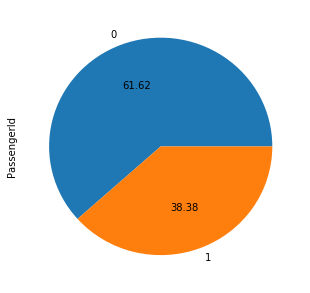

In [10]:
((survival_count/891)*100).plot(kind='pie', autopct='%.2f', figsize=[5,5])

As we can see: 61.62% (549) of the passengers didn't survive
now I'm going to see if that was related to the other factors as age and sex ..

### Survival in relation to Age 

In [11]:
# get the rows with valid age value, also I'll slice the 2 columns I need right now Survived and Age
valid_age_df = titanic_df[(titanic_df['Age'].isnull() == False)][['Survived', 'Age']]
len(valid_age_df)

714

I got 714 valid entries I can do the analysis on

In [12]:
# describtive statistics on the age
valid_age_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

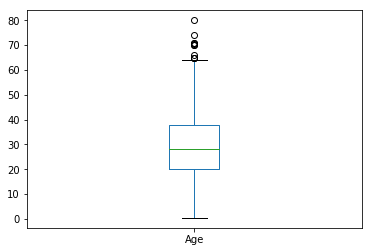

In [13]:
valid_age_df['Age'].plot(kind='box')

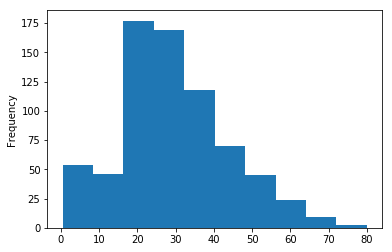

In [14]:
valid_age_df['Age'].plot.hist()

the mean age is about 30 years old , the minimum is less than a year and maximum is 80.
with looking at the box plot we can identify some outliers. and by looking at the histogram we can see that more of the ages are between 20 and 40.

In [15]:
# removeing the outliers
# keep only the ones that are within +3 to -3 standard deviations away from the mean age.
age_df = valid_age_df[np.abs(valid_age_df['Age']-valid_age_df['Age'].mean()) <= (3*valid_age_df['Age'].std())]
age_df['Age'].describe()

count    712.00000
mean      29.56625
std       14.32746
min        0.42000
25%       20.00000
50%       28.00000
75%       38.00000
max       71.00000
Name: Age, dtype: float64

the count now is 712 , 2 outliers were removed and the maximum age now is 71 years

In [16]:
# groub the data by suvival state
age_df.groupby('Survived').describe()

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         423.0  30.523641  14.030541  1.00  21.0  28.0  39.0  71.0
1         289.0  28.164948  14.663215  0.42  19.0  28.0  36.0  63.0

### Age and survival Inferential Statistics
I'm going to split age into categories and perform chi-square test
the age categories I'll create are:
* Children (00-14 years)
* Youth (15-24 years)
* youngAdults (25-44 years)
* oldAdults (45-64 years)
* Seniors (65 years and over)

In [17]:
# Categorizing and counting each survival state for each age category
children = age_df[(age_df['Age'] <= 14)].groupby('Survived').count()
youth  = age_df[(age_df['Age'] > 14) & (age_df['Age'] <= 24)].groupby('Survived').count()
young_adult = age_df[(age_df['Age'] > 24) & (age_df['Age'] <= 44)].groupby('Survived').count()
old_adult = age_df[(age_df['Age'] > 44) & (age_df['Age'] <= 64)].groupby('Survived').count()
senior = age_df[(age_df['Age'] > 64 )].groupby('Survived').count()

print ('Children data: ', children, end='\n\n')
print ('Youth data: ', youth, end='\n\n')
print ('youngAdult data: ', young_adult, end='\n\n')
print ('oldAdult data: ', old_adult, end='\n\n')
print ('Senior data: ', senior, end='\n\n')

Children data:            Age
Survived     
0          32
1          45

Youth data:            Age
Survived     
0         127
1          73

youngAdult data:            Age
Survived     
0         193
1         129

oldAdult data:            Age
Survived     
0          62
1          42

Senior data:            Age
Survived     
0           9



In [18]:
youth.sum()

Age    200
dtype: int64

### Chi-Squared test of Independence
for this test I need to have the observed value for each category and the expected value
> chi^2 = sum( (f_obs-f_exp)^2 / f_exp )

f_obs is the observed value and f_exp is the expected value

In [19]:
# organize the data for chi square test

age_cats = [children, youth, young_adult, old_adult, senior]
age_cats_labels = ['children', 'youth', 'young_adult', 'old_adult', 'senior']
survived = [cat.iloc[1]['Age'] if len(cat)>1 else 0 for cat in age_cats]
notsurvived = [cat.iloc[0]['Age'] for cat in age_cats]

age_observed_df = pd.DataFrame(data = {
                'survived' : survived,
                'notsurvived' : notsurvived
               }, index = age_cats_labels)
N = sum(age_observed_df.sum(axis=1)) # total number
cats_count = age_observed_df.sum(axis=1) # number of passengers for each category
# calculating the expected value for each category

def generate_expected_df(observed_df):
    N = sum(observed_df.sum(axis=1)) # total number
    # calculating the expected value for each category
    expected_df = pd.DataFrame(data = {
                    'survived' : (observed_df.sum(axis=1)/N) * observed_df.sum()['survived'],
                    'notsurvived' : (observed_df.sum(axis=1)/N) * observed_df.sum()['notsurvived']
    })
    return expected_df

age_expected_df = generate_expected_df(age_observed_df)


In [20]:
age_observed_df.sum()

survived       289
notsurvived    423
dtype: int64

In [21]:
age_expected_df.sum()

survived       289.0
notsurvived    423.0
dtype: float64

In [22]:
# calculating chi squared
chi2 = (((age_observed_df - age_expected_df)**2) / age_expected_df).values.sum()

#### Calcuating chi square using python scipy library

In [23]:
# import scipy.stats
import scipy.stats as st

In [24]:
# function that calculates chi square
def calc_chi2(observed_df, expected_df):
    f_obs = list(observed_df['survived']) + list(observed_df['notsurvived'])
    f_exp = list(expected_df['survived']) + list(expected_df['notsurvived'])

    return st.chisquare(f_obs=f_obs, f_exp=f_exp)

age_chi2stat, age_chi2p = calc_chi2(age_observed_df, age_expected_df)

print('age chi^2 statistic = ', age_chi2stat)
print('age chi^2 p-value = ', age_chi2p)

age chi^2 statistic =  17.751100308595902
age chi^2 p-value =  0.038173517948452126


#### Chi squared test results for the Age
>**chi^2 statistic =  17.751100308595902**

>**chi^2 p-value =  0.038173517948452126**

so for an alpha level of 0.05 there is a relationship between age and survival but we need an effect size measure to how much effect the age has on survival. I'll use **Cramer's V** is the effect size measure 

> Cramer's V** = sqrt(chi2/(n*(k-1)))

>n = total number of passengers (sample size),
k = smaller of the number or rows or columns- in this case k=2

In [25]:
import math

def clac_cramersv(chi2stat, n, k):
    return math.sqrt( chi2stat / ( n*(k-1) ) )

In [26]:
k = min(age_observed_df.shape)
age_cramers_v = clac_cramersv(age_chi2stat, N, k)
age_cramers_v

0.15789655049474738

#### Results and Conclusion (Survival in relation to Age)
>chi^2 (4, N = 712) = 17.75, p = 0.038

>Cramer's V = 0.16

_these results of chi^2 suggests that **there is a correlation between age on survival** but Cramer's V points out that it is of a **small effect**_

### Survival in relation to gender

male data:            Sex
Survived     
0         468
1         109

female data:            Sex
Survived     
0          81
1         233


array([<matplotlib.axes._subplots.AxesSubplot object at 0x092C63D0>],
      dtype=object)

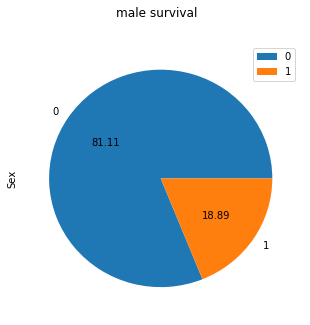

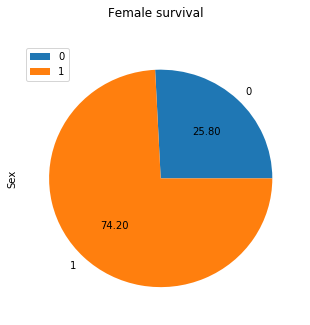

In [27]:
# count how many survived and how many don't foreach gender category
gender_df = titanic_df[['Survived', 'Sex']]
male = gender_df[(gender_df['Sex'] == 'male')].groupby('Survived').count()
female = gender_df[(gender_df['Sex'] == 'female')].groupby('Survived').count()
print('male data: ', male, end= '\n\n')
male.plot(kind='pie', autopct='%.2f', figsize=[5,5], subplots=True, title='male survival')
print('female data: ', female)
female.plot(kind='pie', autopct='%.2f', figsize=[5,5], subplots=True, title='Female survival')

there is 891 passengers: 
- 577 males : 109 survived (18.89%) and 468 didnot (81.11%).
- 314 females: 233 survived (74.20%) and 81 didnot (25.80%).

_we can notice that **higher percentage of females has survived.** I'll also calculat chi-square and cramer's v to confirm the relationship_

In [28]:
survived = [male.iloc[1]['Sex'], female.iloc[1]['Sex']]
notsurvived = [male.iloc[0]['Sex'], female.iloc[0]['Sex']]

sex_observed_df = pd.DataFrame(data = {
                'survived' : survived,
                'notsurvived' : notsurvived
               }, index = ['male', 'female'])

N = sum(sex_observed_df.sum(axis=1)) # total number
# calculating the expected value for each category
sex_expected_df = generate_expected_df(sex_observed_df)

# calculate chi^2
sex_chi2stat, sex_chi2p = calc_chi2(sex_observed_df, sex_expected_df)

print('sex chi^2 statistic = ', sex_chi2stat)
print('sex chi^2 p-value = ', sex_chi2p)

# calculate Cramer's v
k = min(sex_observed_df.shape)
sex_cramers_v = clac_cramersv(sex_chi2stat, N, k)
print("sex Cramer's V = ", sex_cramers_v)

sex chi^2 statistic =  263.05057407065567
sex chi^2 p-value =  9.83773178330153e-57
sex Cramer's V =  0.5433513806577551


#### Chi squared test results for the Sex
>**chi^2 statistic =  263.05057407065567**

>**chi^2 p-value =  9.83773178330153e-57 (very low)**

so for an alpha level of 0.05 or even alpha level of 0.01 there is a relationship between sex and survival and with the Cramer's v = 0.54 there is a large effect.

#### Results and Conclusion (Survival in relation to Sex)
>chi^2 (1, N = 891) = 263.05, p = 9.84e-57 ( p < 0.000001)

>Cramer's V = 0.54

_these results of chi^2 suggests that **there is a correlation between sex on survival** and Cramer's V points out that it is of a **large effect**_

### Survival in relation to family
here I'm going to see if being with a family affects the chance to survive.

In [29]:
# slice the colunm Survived, SibSp, Parch that indicates having family or not
# create a new column "family" True if passenger has family on board, False if not

family = (titanic_df['SibSp'] > 0) | (titanic_df['Parch'] > 0) # series of values of family column
family_detailed_df = titanic_df[['Survived', 'SibSp', 'Parch']]
family_detailed_df.loc[:,'family'] = family

C:\Program Files (x86)\Anaconda2\envs\py36\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files (x86)\Anaconda2\envs\py36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
family_detailed_df.head()

,Survived,SibSp,Parch,family
0,0,1,0,True
1,1,1,0,True
2,1,0,0,False
3,1,1,0,True
4,0,0,0,False


In [31]:
family_df = family_detailed_df[['Survived', 'family']]
# getting the survival count for each family status
family_count = family_df.groupby(['Survived', 'family']).size()
print(family_count)
print('total (n) = ', family_count.sum())
print('# has family = ', family_count.loc[ : , True ].sum())
print('# no family = ', family_count.loc[ : , False ].sum())

Survived  family
0         False     374
          True      175
1         False     163
          True      179
dtype: int64
total (n) =  891
# has family =  354
# no family =  537


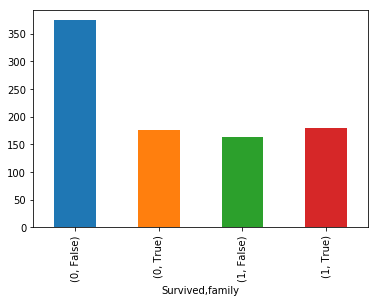

In [32]:
family_count.plot.bar()

there is 891 passengers: 
- 354 has family : 179 survived and 175 didnot.
- 537 no family : 163 survived and 374 didnot.

_we can notice that **higher percentage of passengets who didn't have family didn't survive.** I'll also calculat chi-square and cramer's v to confirm the relationship_

In [33]:
survived = family_count.loc[1, : ].values
notsurvived = family_count.loc[0, : ].values

family_observed_df = pd.DataFrame(data = {
                'survived' : survived,
                'notsurvived' : notsurvived
               }, index= ['nofamily', 'family'])


N = sum(family_observed_df.sum(axis=1)) # total number
# calculating the expected value for each category
family_expected_df = generate_expected_df(family_observed_df)

# calculate chi^2
family_chi2stat, family_chi2p = calc_chi2(family_observed_df, family_expected_df)

print('family chi^2 statistic = ', family_chi2stat)
print('family chi^2 p-value = ', family_chi2p)

# calculate Cramer's v
k = min(family_observed_df.shape)
family_cramers_v = clac_cramersv(family_chi2stat, N, k)
print("family Cramer's V = ", family_cramers_v)

family chi^2 statistic =  36.85013084754587
family chi^2 p-value =  4.949879871232269e-08
family Cramer's V =  0.20336708569989195


#### Chi squared test results for the Family
>**chi^2 statistic =  36.85013084754587**

>**chi^2 p-value =  4.949879871232269e-08 (very low)**

so for an alpha level of 0.05 or even alpha level of 0.01 there is a relationship between having a family on board and survival and with the Cramer's v = 0.20 there is a small effect.

#### Results and Conclusion (Survival in relation to Family)
>chi^2 (1, N = 891) = 36.85, p = 4.95e-08 ( p < 0.000001)

>Cramer's V = 0.20

_these results of chi^2 suggests that **there is a correlation between family on survival** but Cramer's V points out that it is of a **small effect**_